In [12]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Part 1: Importing Data and Understanding It
The dataset I used in this project is [Credit Card Fraud Detection ](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) from Kaggle, The dataset contains transactions made by credit cards in September 2013 by European cardholders.

### 1. Loading the Dataset
- Load the CSV file using the read_csv function from the pandas library.
- Comment: This step imports the data from a CSV file format into a Pandas DataFrame for analysis.

In [14]:
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

100% [......................................................................] 102634230 / 102634230

'creditcard (3).csv'

### 2.Viewing the Data
- View the top rows of the dataset using df.
- Comment: Viewing the first few rows of the dataset gives a basic understanding of the structure and type of data.

In [15]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 3.Basic Information of the Dataset
- Count the number of rows in the dataset.
- Identify the column containing the target values.
- Explain the meaning of the target values.
- Comment: Understanding the size of the dataset and which column is our target (i.e., what we want to predict) is crucial.

In [16]:
num_of_rows = df.shape[0]
print('there are',num_of_rows,'rows')
print('the column "Class" contains the targets')
print('Class = 0 means the target value is valid, Class = 1 means the target value is fraud')

there are 284807 rows
the column "Class" contains the targets
Class = 0 means the target value is valid, Class = 1 means the target value is fraud


### 4.Class Imbalance Issue
- Calculate the percentage for each class.
- Discuss the impact of data imbalance on the model, especially on the KNN classifier.
- Comment: In classification problems, knowing the distribution of categories is very important. Class imbalance can lead to model bias towards the majority class, affecting its performance.

In [17]:
class_0_num = len(df[df['Class'] == 0])
class_1_num = len(df[df['Class'] == 1])
total_num = df.shape[0]
class_0_percentage = class_0_num/total_num
class_1_percentage = class_1_num/total_num
print('the percentage for class 0 is ',class_0_percentage,'%')
print('the percentage for class 1 is ',class_1_percentage,'%')

the percentage for class 0 is  0.9982725143693799 %
the percentage for class 1 is  0.001727485630620034 %


### 5.Splitting the Dataset
- Split the data into training, validation, and test sets.
- Comment: Data splitting is a key step in preparing for model training and evaluation. This way, we can train the model and validate and test its performance on independent datasets.

In [18]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
#split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

#split train and val

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(15/85), random_state=0)

### 6.Plotting the Distributions

- Iterate over each feature and create a subplot for each.
- Use seaborn's histplot to plot the distribution for both classes.
- Add legends and titles to each plot.
- Comment: These histograms allow us to visually compare the distribution of each feature between fraudulent and non-fraudulent transactions. The use of different colors (blue for fraud, red for not-fraud) aids in this visual comparison.

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


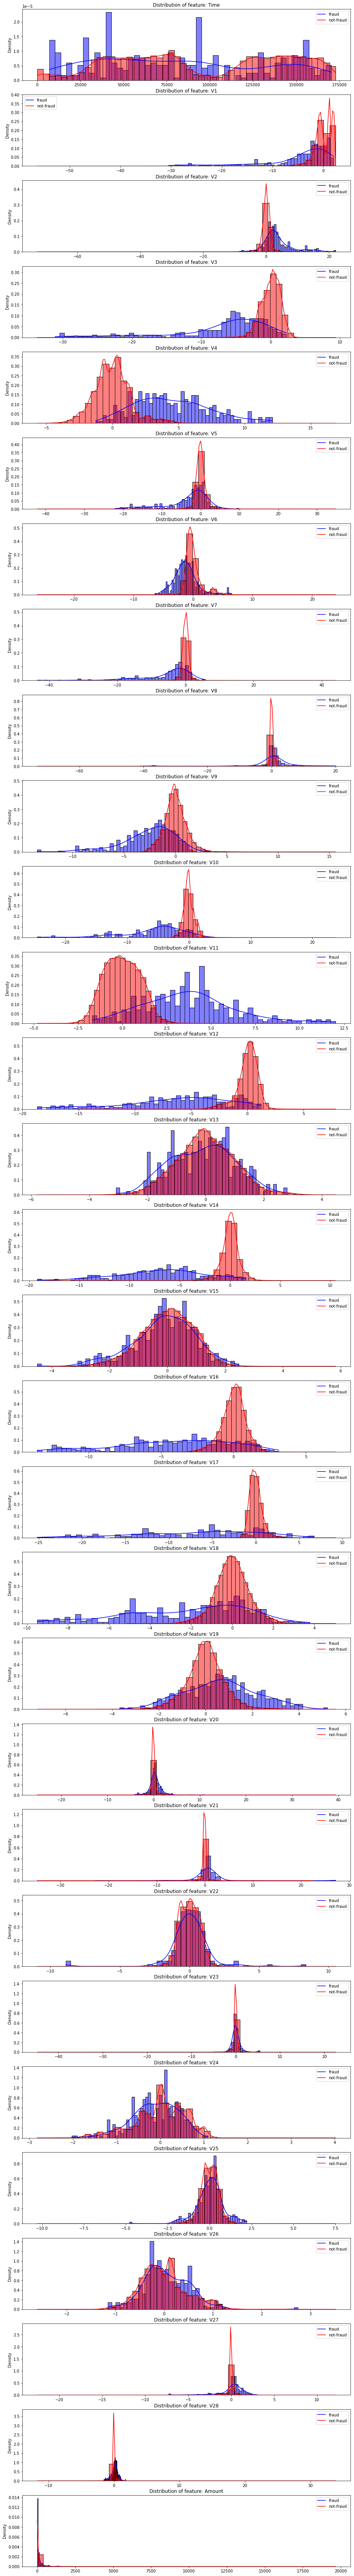

In [19]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

#### Anomaly Detection Insight
- Comment: By examining these graphs, we can identify how the data for each feature is distributed across fraudulent and non-fraudulent transactions. In the context of a Gaussian model, transactions that fall far from the mean (in the tails) of the non-fraudulent distribution could be potential anomalies. This visual inspection is key in understanding the data's behavior and can guide the development of anomaly detection algorithms. 

# Part 2: Build a Single Feature Model with One Gaussian Distribution


### 1. Model Setup and AUC Computation

- Fit a Gaussian model to each V feature of the entire training dataset.
- Calculate AUC for training and validation sets.
- Comment: This process involves using a single Gaussian mixture model for each feature, considering both fraud and non-fraud transactions. AUC, a measure of the model's ability to distinguish between the classes, is calculated to evaluate performance.

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

df_v_feature = df.drop(['Class','Amount','Time'],axis = 1)
v_features = df_v_feature.columns
X_train_v = X_train.drop(['Amount','Time'], axis = 1)
X_val_v = X_val.drop(['Amount','Time'], axis = 1)


gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs_train = []
aucs_val = []
for i in range(28):
    X_train_v_feature = X_train_v.iloc[:, i].values.reshape(-1,1)
    X_val_v_feature = X_val_v.iloc[:, i].values.reshape(-1,1)
    gm.fit(X_train_v_feature)
    train_score = gm.score_samples(X_train_v_feature)
    val_score = gm.score_samples(X_val_v_feature)
    fp_train, tp_train, _ = roc_curve(y_train, 1-train_score)
    fp_val, tp_val, _ = roc_curve(y_val, 1-val_score)
    auc_train = auc(fp_train, tp_train)
    auc_val = auc(fp_val, tp_val)
    aucs_train.append(auc_train)
    aucs_val.append(auc_val)

In [21]:
data = {'features': v_features, 'Train_AUC': aucs_train, 'Val_AUC':aucs_val }
table = pd.DataFrame(data=data)
table

,features,Train_AUC,Val_AUC
0,V1,0.704715,0.731833
1,V2,0.848104,0.837961
2,V3,0.880042,0.832369
3,V4,0.894416,0.871487
4,V5,0.760907,0.816581
5,V6,0.734653,0.721507
6,V7,0.862982,0.872639
7,V8,0.772515,0.828098
8,V9,0.799795,0.820999
9,V10,0.911624,0.914375


### 2.Identifying Best Features

- Select the top 3 features based on validation AUC.
- Comment: The features with the highest AUC are considered the best for differentiating between fraud and non-fraud transactions.

In [22]:


best_3_features = table.sort_values(['Val_AUC'], ascending=[False]).index[:3]

print("The best 3 features are: ", v_features[best_3_features[0]],",",v_features[best_3_features[1]], ",",v_features[best_3_features[2]])


The best 3 features are:  V14 , V12 , V17


### 3.Optimal Threshold for F1 Score

- Determine the optimal threshold for maximizing F1 score for each of these features.
- Comment: This step involves finding a threshold in the model's score that balances precision and recall, as measured by the F1 score.
- The complexity of my method for determining the optimal threshold is O(1),since I used one for loop with 1000 points.

In [23]:
# for column V14
from sklearn.metrics import f1_score

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v14 = X_train[v_features[13]].values.reshape(-1,1)
X_val_v14 = X_val[v_features[13]].values.reshape(-1,1)

gmm.fit(X_train_v14)

val_score = gmm.score_samples(X_val_v14)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V14','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V14 Best Threshold = -23.083734930990516 Maximum F1 Score= 0.6218487394957983


In [24]:
# for column V12

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v12 = X_train[v_features[11]].values.reshape(-1,1)
X_val_v12 = X_val[v_features[11]].values.reshape(-1,1)

gmm.fit(X_train_v12)

val_score = gmm.score_samples(X_val_v12)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V12','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V12 Best Threshold = -12.15412981013424 Maximum F1 Score= 0.6285714285714286


In [25]:
# for column V17

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v17 = X_train[v_features[16]].values.reshape(-1,1)
X_val_v17 = X_val[v_features[16]].values.reshape(-1,1)

gmm.fit(X_train_v17)

val_score = gmm.score_samples(X_val_v17)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V17','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V17 Best Threshold = -21.823881253905707 Maximum F1 Score= 0.5614035087719298


### 4.Modeling Non-Fraud Transactions

- Fit Gaussian models to non-fraud transactions for the best 3 features.
- Calculate AUC and F1 score.
- Comment: This approach tests whether focusing solely on normal (non-fraud) behavior improves the model's anomaly detection performance.

In [26]:
print('the best 3 AUC are ',aucs_val[13],',',aucs_val[11],',',aucs_val[16])

the best 3 AUC are  0.9552970953177244 , 0.9280062095946573 , 0.9257025422574674


In [27]:
# AUC when fit a Gaussian only on not-fraud transactions

X_train_0 = X_train_v[y_train==0]     #only on not-fraud transactions, (class = 0)

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs_val_partb = []
for i in (13,11,16):
    X_train_v_feature = X_train_0.iloc[:, i].values.reshape(-1,1)
    X_val_v_feature = X_val_v.iloc[:, i].values.reshape(-1,1)
    gm.fit(X_train_v_feature)
    train_score = gm.score_samples(X_train_v_feature)
    val_score = gm.score_samples(X_val_v_feature)
    fp_val, tp_val, _ = roc_curve(y_val, 1-val_score)
    auc_val_partb = auc(fp_val, tp_val)
    aucs_val_partb.append(auc_val_partb)

data = {'features':['V14','V12','V17'], 'Auc_Validation_partb': aucs_val_partb}
table = pd.DataFrame(data=data)
table

,features,Auc_Validation_partb
0,V14,0.956061
1,V12,0.928370
2,V17,0.926476


In [28]:
# for column V14

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v14_0 = X_train_0[v_features[13]].values.reshape(-1,1)
X_val_v14 = X_val[v_features[13]].values.reshape(-1,1)

gmm.fit(X_train_v14_0)

val_score = gmm.score_samples(X_val_v14)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V14','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V14 Best Threshold for part b = -26.084337740898604 Maximum F1 Score for part b= 0.6218487394957983


In [29]:
# for column V12

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v12_0 = X_train_0[v_features[11]].values.reshape(-1,1)
X_val_v12 = X_val[v_features[11]].values.reshape(-1,1)

gmm.fit(X_train_v12_0)

val_score = gmm.score_samples(X_val_v12)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V12','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V12 Best Threshold for part b = -13.47682305873901 Maximum F1 Score for part b= 0.6285714285714286


In [30]:
# for column V17

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v17_0 = X_train_0[v_features[16]].values.reshape(-1,1)
X_val_v17 = X_val[v_features[16]].values.reshape(-1,1)

gmm.fit(X_train_v17_0)

val_score = gmm.score_samples(X_val_v17)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V17','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V17 Best Threshold for part b = -27.768574198319403 Maximum F1 Score for part b= 0.5614035087719298


### 5.Comparative Analysis

- Compare results (AUC and F1 score) from the models fitted on all transactions and only non-fraud transactions.
- Comment: This comparison helps in understanding the impact of training data selection on the model's performance.

In [31]:
# compare table
data = {'features':['V14','V12','V17'],'Auc_Validation_part_a':['0.9552970953177244','0.9280062095946573','0.9257025422574674'], 'Auc_Validation_part_b': aucs_val_partb,\
     'f1_score_for_part_a':['0.6218487394957983','0.6285714285714286','0.5614035087719298'],'f1_score_for_part_b':['0.6218487394957983','0.6285714285714286','0.5614035087719298']}
table = pd.DataFrame(data=data)
table

,features,Auc_Validation_part_a,Auc_Validation_part_b,f1_score_for_part_a,f1_score_for_part_b
0,V14,0.9552970953177244,0.956061,0.6218487394957983,0.6218487394957983
1,V12,0.9280062095946573,0.928370,0.6285714285714286,0.6285714285714286
2,V17,0.9257025422574674,0.926476,0.5614035087719298,0.5614035087719298


### 6.Analysis of Similarity in Results

- The results between part a and part b are very similar, and the F1 scores are excally the same.
- I think the reason is that the dataset is unbalanced, most of the transactions are not-fraud transactions, so there is no too much difference on not-fraud transactions and all transactions

# Part 3.Multiple Feature Model with One Gaussian Distribution

### 1.Feature Selection and Visualization

- Select pairs of features (e.g., V3 and V8) for analysis.
- Create scatter plots to visualize the distribution of these features, color-coded by class.
- Comment: Visualizing the data helps in understanding the relationship between features and identifying patterns that might indicate fraud.

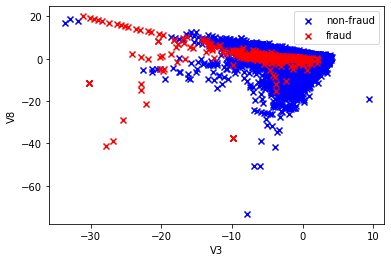

In [32]:
#pick feactures V3 and V8

plt.scatter(X_train['V3'][y_train==0],X_train['V8'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V3'][y_train==1],X_train['V8'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V3')
plt.ylabel('V8')
plt.legend()

### 2.Deciding the Number of Gaussian Components

- Based on the visual distribution, decide the number of Gaussian components needed.
- Comment: The choice of n_components is crucial for modeling the data accurately. A visual inspection can guide this decision, focusing on capturing the main clusters of valid transactions.
- Based on the plot, I decide n = 1, because there is 1 cluster of valid transactions

### 3.Fitting Gaussian Model

- Fit a Gaussian mixture model to the chosen pairs of features.
- Compute AUC for both training and validation sets.
- Comment: This step involves using Gaussian mixture models to fit the selected feature pairs, evaluating how well the model differentiates between fraud and non-fraud transactions.

In [33]:
#Fit Gaussian model
X_train_V38 = X_train[['V3','V8']]
X_val_V38 = X_val[['V3','V8']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V38)


#Compute AUC on both training and validation sets

score_train = gmm.score_samples(X_train_V38)
score_validation = gmm.score_samples(X_val_V38)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.8843430465562495
AUC for validation set is: 0.8480933999242405


### 4.Repeat Analysis for New Feature Pairs

Pick additional pairs of features and repeat the process.
Comment: Analyzing multiple pairs of features provides a broader understanding of the dataset's structure and the relationships between different features.

AUC for training set is: 0.8109665646801025
AUC for validation set is: 0.8099863290683302


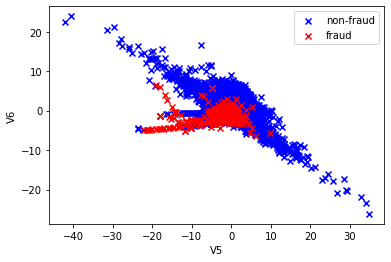

In [34]:
# First pair: pick V5 AND V6

# Scatter plot
plt.scatter(X_train['V5'][y_train==0],X_train['V6'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V5'][y_train==1],X_train['V6'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V5')
plt.ylabel('V6')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V56 = X_train[['V5','V6']]
X_val_V56 = X_val[['V5','V6']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V56)

#Compute AUC on both training and validation sets

score_train_V56 = gmm.score_samples(X_train_V56)
score_validation_V56 = gmm.score_samples(X_val_V56)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V56)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V56)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.9472020905841969
AUC for validation set is: 0.9281148626171833


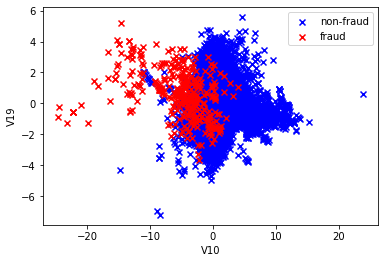

In [35]:
# Second pair: pick V10 AND V19

# Scatter plot
plt.scatter(X_train['V10'][y_train==0],X_train['V19'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V10'][y_train==1],X_train['V19'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V10')
plt.ylabel('V19')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V1019 = X_train[['V10','V19']]
X_val_V1019 = X_val[['V10','V19']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V1019)

#Compute AUC on both training and validation sets

score_train_V1019 = gmm.score_samples(X_train_V1019)
score_validation_V1019 = gmm.score_samples(X_val_V1019)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V1019)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V1019)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.5680560416299383
AUC for validation set is: 0.5852747619122038


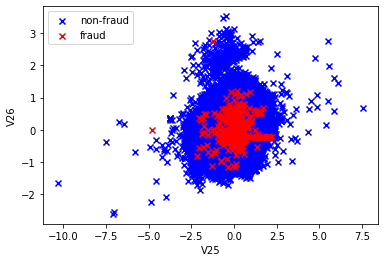

In [36]:
# Third pair: pick V25 AND V26

# Scatter plot
plt.scatter(X_train['V25'][y_train==0],X_train['V26'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V25'][y_train==1],X_train['V26'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V25')
plt.ylabel('V26')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V2526 = X_train[['V25','V26']]
X_val_V2526 = X_val[['V25','V26']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V2526)

#Compute AUC on both training and validation sets

score_train_V2526 = gmm.score_samples(X_train_V2526)
score_validation_V2526 = gmm.score_samples(X_val_V2526)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V2526)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V2526)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

### 5. Threshold Determination for Anomaly Detection

- For each pair of features, find a threshold that maximizes the F1 score on the validation set.
- Comment: This step is crucial for determining the boundary between normal and anomalous transactions. The F1 score helps balance the trade-off between precision and recall.

In [37]:
# V5 and V6
sorted_val_score_56 = sorted(score_validation_V56)  #sort points by probability first

max_f1_56 = 0
best_threshold_56 = 0
tr_56=0

for i in range(0, 1000):
    tr_56 = sorted_val_score_56[i]
    f1_56 = f1_score(y_val, score_validation_V56 < tr_56)
    if (f1_56>max_f1_56):
        max_f1_56=f1_56
        best_threshold_56=tr_56

# V10 and V19
sorted_val_score_1019 = sorted(score_validation_V1019)  #sort points by probability first

max_f1_1019 = 0
best_threshold_1019 = 0
tr_1019=0

for i in range(0, 1000):
    tr_1019 = sorted_val_score_1019[i]
    f1_1019 = f1_score(y_val, score_validation_V1019 < tr_1019)
    if (f1_1019>max_f1_1019):
        max_f1_1019=f1_1019
        best_threshold_1019=tr_1019


# V25 and V26
sorted_val_score_2526 = sorted(score_validation_V2526)  #sort points by probability first

max_f1_2526 = 0
best_threshold_2526 = 0
tr_2526=0

for i in range(0, 1000):
    tr_2526 = sorted_val_score_2526[i]
    f1_2526 = f1_score(y_val, score_validation_V2526 < tr_2526)
    if (f1_2526>max_f1_2526):
        max_f1_2526=f1_2526
        best_threshold_2526=tr_2526

print("Optimal Threshold of V5 AND V6 =",best_threshold_56,"with F1 score =",max_f1_56)
print("Optimal Threshold of V10 AND V19 =",best_threshold_1019,"with F1 score =",max_f1_1019)
print("Optimal Threshold of V25 AND V26 =",best_threshold_2526,"with F1 score =",max_f1_2526 )

Optimal Threshold of V5 AND V6 = -32.823802195173435 with F1 score = 0.16107382550335567
Optimal Threshold of V10 AND V19 = -23.174707595681255 with F1 score = 0.25136612021857924
Optimal Threshold of V25 AND V26 = -23.903905617256328 with F1 score = 0.0273972602739726


### 6. Visualizing Outliers

- Plot the same scatter plots as before but with outliers circled based on the determined threshold.
- Comment: This visualization helps in understanding how the model identifies outliers and potential fraud transactions.

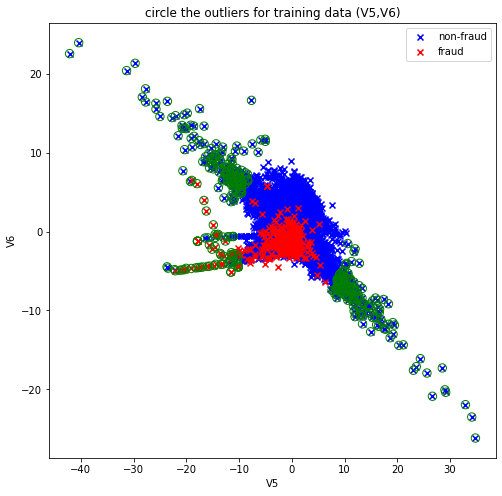

In [38]:
# First pair: pick V5 AND V6

# circle the outliers for training data
X_train_V56_array = np.array(X_train[['V5','V6']]).reshape(-1,2)
X_val_V56_array = np.array(X_val[['V5','V6']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V5'][y_train==0],X_train['V6'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V5'][y_train==1],X_train['V6'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V5')
plt.ylabel('V6')
plt.legend()


X_train_V56_array = np.array(X_train[['V5','V6']]).reshape(-1,2)
X_val_V56_array = np.array(X_val[['V5','V6']]).reshape(-1,2)

outliers = np.nonzero(score_train_V56<best_threshold_56)[0]
plt.scatter(X_train_V56_array[outliers,0],X_train_V56_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V5,V6)')
plt.show()

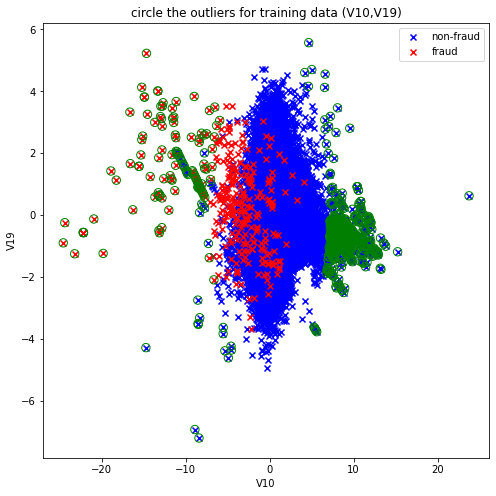

In [39]:
# Second pair: pick V10 AND V19

# circle the outliers for training data
X_train_V1019_array = np.array(X_train[['V10','V19']]).reshape(-1,2)
X_val_V1019_array = np.array(X_val[['V10','V19']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V10'][y_train==0],X_train['V19'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V10'][y_train==1],X_train['V19'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V10')
plt.ylabel('V19')
plt.legend()


X_train_V1019_array = np.array(X_train[['V10','V19']]).reshape(-1,2)
X_val_V1019_array = np.array(X_val[['V10','V19']]).reshape(-1,2)

outliers = np.nonzero(score_train_V1019<best_threshold_1019)[0]
plt.scatter(X_train_V1019_array[outliers,0],X_train_V1019_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V10,V19)')
plt.show()

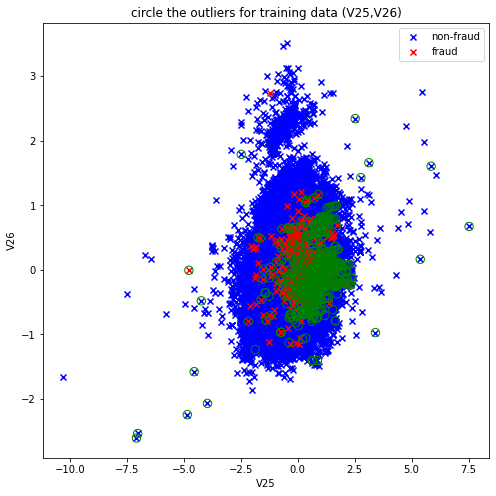

In [40]:
# Third pair: pick V25 AND V26

# circle the outliers for training data
X_train_V2526_array = np.array(X_train[['V25','V26']]).reshape(-1,2)
X_val_V2526_array = np.array(X_val[['V25','V26']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V25'][y_train==0],X_train['V26'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V25'][y_train==1],X_train['V26'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V25')
plt.ylabel('V26')
plt.legend()


X_train_V2526_array = np.array(X_train[['V25','V26']]).reshape(-1,2)
X_val_V2526_array = np.array(X_val[['V25','V26']]).reshape(-1,2)

outliers = np.nonzero(score_train_V1019<best_threshold_1019)[0]
plt.scatter(X_train_V2526_array[outliers,0],X_train_V2526_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V25,V26)')
plt.show()

# Part 4: Single Feature Model with Two Gaussian Distributions

### 1.Fitting Separate Gaussian Models

- Fit one Gaussian distribution (G1) for non-fraud transactions and another (G2) for fraud transactions for a selected feature.
- Comment: This dual-model approach allows for capturing distinct characteristics of fraud and non-fraud transactions in the feature's distribution.

### 2.Score Sample Computation

- Compute the score samples for G1 and G2 on the validation set.
- Comment: Score samples reflect how likely it is for data points in the validation set to belong to the distribution represented by G1 or G2.

In [41]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

# pick feature V7  Fit a Gaussian distribution ( G1 )
X_train_0 = X_train['V7'][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,1)
X_val_array = np.array(X_val[['V7']]).reshape(-1,1)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)

# 2 Fit another Gaussian distribution ( G2 )
X_train_1 = X_train['V7'][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,1)

gmm_1 = GaussianMixture(n_components=1, random_state=0)
gmm_1.fit(X_train_array_1)

# 3 Compute the score samples ( S ) for both  G1  and  G2
S1 = gmm_0.score_samples(X_val_array)
S2 = gmm_1.score_samples(X_val_array)

### 3.Finding Optimal Multiplier c

- Determine the optimal multiplier c that maximizes the F1 Score.
- Comment: The optimal c helps in setting a threshold for distinguishing between fraud and non-fraud transactions based on their likelihood scores from G1 and G2.

In [42]:
# Find an optimal c and the maximum  F1 Score
c=0
max_c=0
max_f1=0


while(c<=10):
  f1 = f1_score(y_val, S1 < c*S2)
  if(f1 > max_f1):
    max_f1 = f1
    max_c = c
  c = c+0.1

print("Optimal c of V7 =",max_c,"with F1 score =",max_f1)

Optimal c of V7 = 9.99999999999998 with F1 score = 0.2769230769230769


### 4. Repeat for All Features

- Repeat the process for all features to find the best F1 Score, the corresponding feature, and the value of c.
- Comment: This comprehensive analysis across all features identifies the most effective feature and threshold for classifying transactions.

In [43]:
# for validation set:

optimal_c = []
best_f1 = []

for v_feature in v_features:
  X_train_0 = X_train[v_feature][y_train==0]
  X_train_array_0 = np.array(X_train_0).reshape(-1,1)
  X_val_array = np.array(X_val[[v_feature]]).reshape(-1,1)

  gmm_0 = GaussianMixture(n_components=1, random_state=0)
  gmm_0.fit(X_train_array_0)


  X_train_1 = X_train[v_feature][y_train==1]
  X_train_array_1 = np.array(X_train_1).reshape(-1,1)

  gmm_1 = GaussianMixture(n_components=1, random_state=0)
  gmm_1.fit(X_train_array_1)

  S1 = gmm_0.score_samples(X_val_array)
  S2 = gmm_1.score_samples(X_val_array)

  c=0
  max_c=0
  max_f1=0

  while(c<=10):
    f1 = f1_score(y_val, S1 < c*S2)
    if(f1 > max_f1):
      max_f1 = f1
      max_c = c
    c = c+0.1

  optimal_c.append(max_c)
  best_f1.append(max_f1)

data={'Feature': v_features, 'Optimal C': optimal_c, 'Best F1 score': best_f1}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C,Best F1 score
0,V1,8.1,0.141593
1,V2,5.9,0.177215
2,V3,8.2,0.304762
3,V4,5.0,0.366972
4,V5,8.5,0.209524
5,V6,2.2,0.123596
6,V7,10.0,0.276923
7,V8,9.2,0.100000
8,V9,3.3,0.484211
9,V10,8.0,0.469388


### 5. Results Analysis

- Analyze which feature and multiplier c give the best F1 Score for both training and validation sets.
- Comment: This step concludes which feature is most effective in distinguishing fraud from non-fraud transactions using the two-Gaussian model approach.

In [44]:
# for training set:

optimal_c = []
best_f1 = []

for v_feature in v_features:
  X_train_0 = X_train[v_feature][y_train==0]
  X_train_array_0 = np.array(X_train_0).reshape(-1,1)
  X_train_array = np.array(X_train[[v_feature]]).reshape(-1,1)

  gmm_0 = GaussianMixture(n_components=1, random_state=0)
  gmm_0.fit(X_train_array_0)


  X_train_1 = X_train[v_feature][y_train==1]
  X_train_array_1 = np.array(X_train_1).reshape(-1,1)

  gmm_1 = GaussianMixture(n_components=1, random_state=0)
  gmm_1.fit(X_train_array_1)

  S1 = gmm_0.score_samples(X_train_array)
  S2 = gmm_1.score_samples(X_train_array)

  c=0
  max_c=0
  max_f1=0

  while(c<=10):
    f1 = f1_score(y_train, S1 < c*S2)
    if(f1 > max_f1):
      max_f1 = f1
      max_c = c
    c = c+0.1

  optimal_c.append(max_c)
  best_f1.append(max_f1)

data={'Feature': v_features, 'Optimal C': optimal_c, 'Best F1 score': best_f1}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C,Best F1 score
0,V1,6.7,0.144681
1,V2,6.1,0.166259
2,V3,5.1,0.292011
3,V4,4.2,0.371658
4,V5,8.2,0.179661
5,V6,1.8,0.110236
6,V7,10.0,0.245023
7,V8,10.0,0.089172
8,V9,3.1,0.418426
9,V10,8.0,0.414873


# Part 5: Multivariate and Mixture of Gaussians Distribution

### 1.Model Design and Fitting

- Experiment with different model configurations, including single or two-gaussian models, varying numbers of features, and different numbers of components.
- Fit these models to your data, considering both fraud and non-fraud transactions.
- Comment: Exploring various model configurations helps in identifying the most effective approach for anomaly detection in this context.

### 2. Performance Evaluation

- Compute the AUC and F1 score for each model on both the training and validation sets.
- Comment: AUC and F1 score are crucial metrics for evaluating the performance of these models in terms of their ability to distinguish between fraud and non-fraud transactions.

#### Model 1

two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 1 component for fraud.

In [45]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=1, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,7.1,0.784733,6.7,0.8,0.958537,0.952565


#### Model 2

two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 4 components for fraud.

In [46]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,6.8,0.789238,7.4,0.803279,0.958537,0.952565


#### Model 3

two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 6 components for fraud.



In [47]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=6, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,6.7,0.791789,6.2,0.769231,0.958537,0.952565


#### Model 4

two-gaussian model, multiple features V12,V14,V17,V8,V19 a single component for the valid transaction, and 4 components for fraud.



In [48]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17','V8','V19']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,5)
X_train_array = np.array(X_train[['V12','V14','V17','V8','V19']]).reshape(-1,5)
X_val_array = np.array(X_val[['V12','V14','V17','V8','V19']]).reshape(-1,5)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17','V8','V19']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,5)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17 V8 V19', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17 V8 V19,7.4,0.681416,6.2,0.661871,0.967025,0.952807


#### Model 5

two-gaussian model, multiple features V12,V14,V17,V3,V8,V10,V15 a single component for the valid transaction, and 4 components for fraud.



In [49]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17','V3','V8','V10','V15']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,7)
X_train_array = np.array(X_train[['V12','V14','V17','V3','V8','V10','V15']]).reshape(-1,7)
X_val_array = np.array(X_val[['V12','V14','V17','V3','V8','V10','V15']]).reshape(-1,7)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17','V3','V8','V10','V15']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,7)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17 V3 V8 V10 V15', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17 V3 V8 V10 V15,6.9,0.738061,5.8,0.690647,0.964442,0.945002


#### Model 6

two-gaussian model, multiple features V12,V14,V17, 2 components for the valid transaction, and 4 components for fraud.



In [50]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=2, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,3.4,0.784431,3.0,0.787879,0.959236,0.951853


#### Model 7

single-gaussian model, multiple features V12,V14,V17, a single component.



In [51]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-37.874206,0.708752,-32.935749,0.690141,0.958748,0.95351


#### Model 8

single-gaussian model, multiple features V12,V14,V17, 4 components.



In [52]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-13.211818,0.53125,-14.056821,0.490196,0.960321,0.952944


#### Model 9

single-gaussian model, single feature V12, 4 components.



In [53]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train['V12']).reshape(-1,1)
X_val_array = np.array(X_val['V12']).reshape(-1,1)

gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-7.732001,0.548552,-8.794563,0.525253,0.924229,0.934108


#### Model 10

single-gaussian model, single feature V12, single component.

In [54]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train['V12']).reshape(-1,1)
X_val_array = np.array(X_val['V12']).reshape(-1,1)

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12,-10.900757,0.697749,-12.15413,0.628571,0.912838,0.928006


### 3.Optimal Model Determination

- Determine the best model configuration based on the highest F1 scores and AUC values.
- Comment: The best model should strike a balance between effectively identifying fraud transactions (high F1 score) and generalizing well to unseen data (high AUC).


### 4. Result Summary
- The modles that with two-gaussian, multiple features, single component for the valid transaction, and multiple components for fraud works better
- The model with features V12,V14,V17 ,2 Gaussians,single component for the valid transaction, and 4 components for fraud is the best model
- The different type of fraud transactions may have the different number of clusters represent the fraud transactions, so we can use the multiple components.

# Part 6:Evaluating performance on test set


### Model Selection

- The best model, based on previous evaluations, uses features V12, V14, V17 with two Gaussian distributions: one for valid transactions (single component) and one for fraudulent transactions (four components).
- Comment: This model was chosen due to its superior performance in terms of F1 score, precision, and recall on the training and validation sets.

In [55]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

optimal_c_test = []
best_f1_test = []
precision_on_test = []
recall_on_test = []

X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_test_array = np.array(X_test[['V12','V14','V17']]).reshape(-1,3)


gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_test = gmm_0.score_samples(X_test_array)
S2_test = gmm_1.score_samples(X_test_array)



c_test=0
max_c_test=0
max_f1_test=0


while(c_test<=10):
  f1_test = f1_score(y_test, S1_test < c_test*S2_test)
  if(f1_test > max_f1_test):
    max_f1_test = f1_test
    max_c_test = c_test
    precision_test = precision_score(y_test, S1_test < c_test*S2_test)
    recall_test = recall_score(y_test, S1_test < c_test*S2_test)
  c_test = c_test+0.1



optimal_c_test.append(max_c_test)
best_f1_test.append(max_f1_test)
precision_on_test.append(precision_test)
recall_on_test.append(recall_test)

data={'Feature': 'V12 V14 V17', 'Optimal C Test': optimal_c_test, 'Best F1 score Test': best_f1_test,\
   'Precision Test': precision_on_test, 'Recall Test': recall_on_test}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Test,Best F1 score Test,Precision Test,Recall Test
0,V12 V14 V17,5.1,0.792208,0.7625,0.824324
